In [11]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import scipy

In [81]:
our_own_dataset = []

# load the png image data
for image_file_name in glob.glob('nepali_characters/*/*/*.jpg'):
    # use the filename to set the correct label
    label = int(image_file_name[-14:-11])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = scipy.misc.imread(image_file_name, flatten=True)  #Read an image from a file as an array
    
    # reshape from 28x28 to list of 784 values, invert values
 #   img_data  = (255.0 - img_array.reshape(784))/255.0
    
    # then scale data to range from 0.01 to 1.0
#     img_data = (img_data / 255.0 * 0.99) + 0.01
#     print(np.min(img_data))
#     print(np.max(img_data))
    
    # append label and image data  to test data set
    record = np.append(label,img_array)
    our_own_dataset.append(record)

loading ...  nepali_characters/02_vowels/013/004_09.jpg
loading ...  nepali_characters/02_vowels/013/016_04.jpg
loading ...  nepali_characters/02_vowels/013/023_01.jpg
loading ...  nepali_characters/02_vowels/013/045_02.jpg
loading ...  nepali_characters/02_vowels/013/044_02.jpg
loading ...  nepali_characters/02_vowels/013/019_02.jpg
loading ...  nepali_characters/02_vowels/013/004_10.jpg
loading ...  nepali_characters/02_vowels/013/030_02.jpg
loading ...  nepali_characters/02_vowels/013/013_03.jpg
loading ...  nepali_characters/02_vowels/013/029_01.jpg
loading ...  nepali_characters/02_vowels/013/001_22.jpg
loading ...  nepali_characters/02_vowels/013/001_03.jpg
loading ...  nepali_characters/02_vowels/013/017_02.jpg
loading ...  nepali_characters/02_vowels/013/018_02.jpg
loading ...  nepali_characters/02_vowels/013/008_03.jpg
loading ...  nepali_characters/02_vowels/013/013_06.jpg
loading ...  nepali_characters/02_vowels/013/019_06.jpg
loading ...  nepali_characters/02_vowels/013/019

/home/uttam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


loading ...  nepali_characters/02_vowels/011/001_09.jpg
loading ...  nepali_characters/02_vowels/011/044_01.jpg
loading ...  nepali_characters/02_vowels/011/041_02.jpg
loading ...  nepali_characters/02_vowels/011/014_01.jpg
loading ...  nepali_characters/02_vowels/011/035_02.jpg
loading ...  nepali_characters/02_vowels/011/033_02.jpg
loading ...  nepali_characters/02_vowels/011/004_12.jpg
loading ...  nepali_characters/02_vowels/011/034_02.jpg
loading ...  nepali_characters/02_vowels/011/019_07.jpg
loading ...  nepali_characters/02_vowels/011/020_01.jpg
loading ...  nepali_characters/02_vowels/011/011_04.jpg
loading ...  nepali_characters/02_vowels/011/015_03.jpg
loading ...  nepali_characters/02_vowels/011/004_05.jpg
loading ...  nepali_characters/02_vowels/011/018_04.jpg
loading ...  nepali_characters/02_vowels/011/037_02.jpg
loading ...  nepali_characters/02_vowels/011/006_03.jpg
loading ...  nepali_characters/02_vowels/011/028_01.jpg
loading ...  nepali_characters/02_vowels/011/020

loading ...  nepali_characters/02_vowels/014/004_09.jpg
loading ...  nepali_characters/02_vowels/014/016_04.jpg
loading ...  nepali_characters/02_vowels/014/023_01.jpg
loading ...  nepali_characters/02_vowels/014/045_02.jpg
loading ...  nepali_characters/02_vowels/014/044_02.jpg
loading ...  nepali_characters/02_vowels/014/019_02.jpg
loading ...  nepali_characters/02_vowels/014/004_10.jpg
loading ...  nepali_characters/02_vowels/014/030_02.jpg
loading ...  nepali_characters/02_vowels/014/013_03.jpg
loading ...  nepali_characters/02_vowels/014/029_01.jpg
loading ...  nepali_characters/02_vowels/014/001_22.jpg
loading ...  nepali_characters/02_vowels/014/001_03.jpg
loading ...  nepali_characters/02_vowels/014/017_02.jpg
loading ...  nepali_characters/02_vowels/014/018_02.jpg
loading ...  nepali_characters/02_vowels/014/008_03.jpg
loading ...  nepali_characters/02_vowels/014/013_06.jpg
loading ...  nepali_characters/02_vowels/014/019_06.jpg
loading ...  nepali_characters/02_vowels/014/019

loading ...  nepali_characters/02_vowels/010/017_10.jpg
loading ...  nepali_characters/02_vowels/010/013_09.jpg
loading ...  nepali_characters/02_vowels/010/001_05.jpg
loading ...  nepali_characters/02_vowels/010/037_01.jpg
loading ...  nepali_characters/02_vowels/010/020_10.jpg
loading ...  nepali_characters/02_vowels/010/027_01.jpg
loading ...  nepali_characters/02_vowels/010/018_05.jpg
loading ...  nepali_characters/02_vowels/010/022_02.jpg
loading ...  nepali_characters/02_vowels/010/012_11.jpg
loading ...  nepali_characters/02_vowels/010/006_04.jpg
loading ...  nepali_characters/02_vowels/010/019_04.jpg
loading ...  nepali_characters/02_vowels/010/016_05.jpg
loading ...  nepali_characters/02_vowels/010/030_03.jpg
loading ...  nepali_characters/02_vowels/010/001_06.jpg
loading ...  nepali_characters/02_vowels/010/017_07.jpg
loading ...  nepali_characters/02_vowels/010/010_02.jpg
loading ...  nepali_characters/02_vowels/010/005_03.jpg
loading ...  nepali_characters/02_vowels/010/012

loading ...  nepali_characters/02_vowels/018/019_07.jpg
loading ...  nepali_characters/02_vowels/018/020_01.jpg
loading ...  nepali_characters/02_vowels/018/011_04.jpg
loading ...  nepali_characters/02_vowels/018/015_03.jpg
loading ...  nepali_characters/02_vowels/018/004_05.jpg
loading ...  nepali_characters/02_vowels/018/018_04.jpg
loading ...  nepali_characters/02_vowels/018/037_02.jpg
loading ...  nepali_characters/02_vowels/018/006_03.jpg
loading ...  nepali_characters/02_vowels/018/028_01.jpg
loading ...  nepali_characters/02_vowels/018/020_08.jpg
loading ...  nepali_characters/02_vowels/018/020_06.jpg
loading ...  nepali_characters/02_vowels/018/012_03.jpg
loading ...  nepali_characters/02_vowels/018/018_09.jpg
loading ...  nepali_characters/02_vowels/018/011_07.jpg
loading ...  nepali_characters/02_vowels/018/007_03.jpg
loading ...  nepali_characters/02_vowels/018/004_04.jpg
loading ...  nepali_characters/02_vowels/018/018_10.jpg
loading ...  nepali_characters/02_vowels/018/008

loading ...  nepali_characters/02_vowels/016/041_02.jpg
loading ...  nepali_characters/02_vowels/016/014_01.jpg
loading ...  nepali_characters/02_vowels/016/035_02.jpg
loading ...  nepali_characters/02_vowels/016/033_02.jpg
loading ...  nepali_characters/02_vowels/016/004_12.jpg
loading ...  nepali_characters/02_vowels/016/034_02.jpg
loading ...  nepali_characters/02_vowels/016/019_07.jpg
loading ...  nepali_characters/02_vowels/016/020_01.jpg
loading ...  nepali_characters/02_vowels/016/011_04.jpg
loading ...  nepali_characters/02_vowels/016/015_03.jpg
loading ...  nepali_characters/02_vowels/016/004_05.jpg
loading ...  nepali_characters/02_vowels/016/018_04.jpg
loading ...  nepali_characters/02_vowels/016/037_02.jpg
loading ...  nepali_characters/02_vowels/016/006_03.jpg
loading ...  nepali_characters/02_vowels/016/028_01.jpg
loading ...  nepali_characters/02_vowels/016/020_08.jpg
loading ...  nepali_characters/02_vowels/016/020_06.jpg
loading ...  nepali_characters/02_vowels/016/012

loading ...  nepali_characters/02_vowels/021/017_08.jpg
loading ...  nepali_characters/02_vowels/021/008_01.jpg
loading ...  nepali_characters/02_vowels/021/011_06.jpg
loading ...  nepali_characters/02_vowels/021/013_05.jpg
loading ...  nepali_characters/02_vowels/021/014_10.jpg
loading ...  nepali_characters/02_vowels/021/004_11.jpg
loading ...  nepali_characters/02_vowels/021/019_10.jpg
loading ...  nepali_characters/02_vowels/021/012_06.jpg
loading ...  nepali_characters/02_vowels/021/004_07.jpg
loading ...  nepali_characters/02_vowels/021/004_06.jpg
loading ...  nepali_characters/02_vowels/021/007_09.jpg
loading ...  nepali_characters/02_vowels/021/046_02.jpg
loading ...  nepali_characters/02_vowels/021/008_02.jpg
loading ...  nepali_characters/02_vowels/021/015_06.jpg
loading ...  nepali_characters/02_vowels/021/014_04.jpg
loading ...  nepali_characters/02_vowels/021/013_02.jpg
loading ...  nepali_characters/02_vowels/021/015_01.jpg
loading ...  nepali_characters/02_vowels/021/016

loading ...  nepali_characters/01_numerals/008/002_09.jpg
loading ...  nepali_characters/01_numerals/008/016_02.jpg
loading ...  nepali_characters/01_numerals/008/007_05.jpg
loading ...  nepali_characters/01_numerals/008/012_17.jpg
loading ...  nepali_characters/01_numerals/008/019_05.jpg
loading ...  nepali_characters/01_numerals/008/022_05.jpg
loading ...  nepali_characters/01_numerals/008/006_01.jpg
loading ...  nepali_characters/01_numerals/008/001_15.jpg
loading ...  nepali_characters/01_numerals/008/001_16.jpg
loading ...  nepali_characters/01_numerals/008/007_10.jpg
loading ...  nepali_characters/01_numerals/008/022_01.jpg
loading ...  nepali_characters/01_numerals/008/017_10.jpg
loading ...  nepali_characters/01_numerals/008/013_09.jpg
loading ...  nepali_characters/01_numerals/008/001_05.jpg
loading ...  nepali_characters/01_numerals/008/037_01.jpg
loading ...  nepali_characters/01_numerals/008/020_10.jpg
loading ...  nepali_characters/01_numerals/008/027_01.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/009/034_01.jpg
loading ...  nepali_characters/01_numerals/009/001_11.jpg
loading ...  nepali_characters/01_numerals/009/016_06.jpg
loading ...  nepali_characters/01_numerals/009/011_10.jpg
loading ...  nepali_characters/01_numerals/009/016_01.jpg
loading ...  nepali_characters/01_numerals/009/036_02.jpg
loading ...  nepali_characters/01_numerals/009/025_04.jpg
loading ...  nepali_characters/01_numerals/009/046_01.jpg
loading ...  nepali_characters/01_numerals/009/019_08.jpg
loading ...  nepali_characters/01_numerals/009/010_09.jpg
loading ...  nepali_characters/01_numerals/009/013_01.jpg
loading ...  nepali_characters/01_numerals/009/021_07.jpg
loading ...  nepali_characters/01_numerals/009/010_06.jpg
loading ...  nepali_characters/01_numerals/009/001_20.jpg
loading ...  nepali_characters/01_numerals/009/008_10.jpg
loading ...  nepali_characters/01_numerals/009/001_17.jpg
loading ...  nepali_characters/01_numerals/009/012_10.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/007/005_14.jpg
loading ...  nepali_characters/01_numerals/007/008_04.jpg
loading ...  nepali_characters/01_numerals/007/005_05.jpg
loading ...  nepali_characters/01_numerals/007/030_04.jpg
loading ...  nepali_characters/01_numerals/007/006_02.jpg
loading ...  nepali_characters/01_numerals/007/011_05.jpg
loading ...  nepali_characters/01_numerals/007/006_09.jpg
loading ...  nepali_characters/01_numerals/007/016_10.jpg
loading ...  nepali_characters/01_numerals/007/040_02.jpg
loading ...  nepali_characters/01_numerals/007/038_02.jpg
loading ...  nepali_characters/01_numerals/007/001_10.jpg
loading ...  nepali_characters/01_numerals/007/001_04.jpg
loading ...  nepali_characters/01_numerals/007/015_04.jpg
loading ...  nepali_characters/01_numerals/007/005_04.jpg
loading ...  nepali_characters/01_numerals/007/017_04.jpg
loading ...  nepali_characters/01_numerals/007/023_02.jpg
loading ...  nepali_characters/01_numerals/007/007_08.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/006/002_13.jpg
loading ...  nepali_characters/01_numerals/006/004_02.jpg
loading ...  nepali_characters/01_numerals/006/002_01.jpg
loading ...  nepali_characters/01_numerals/006/010_10.jpg
loading ...  nepali_characters/01_numerals/006/007_02.jpg
loading ...  nepali_characters/01_numerals/006/012_02.jpg
loading ...  nepali_characters/01_numerals/006/005_13.jpg
loading ...  nepali_characters/01_numerals/006/014_08.jpg
loading ...  nepali_characters/01_numerals/006/043_02.jpg
loading ...  nepali_characters/01_numerals/006/019_01.jpg
loading ...  nepali_characters/01_numerals/006/014_09.jpg
loading ...  nepali_characters/01_numerals/006/032_02.jpg
loading ...  nepali_characters/01_numerals/006/013_10.jpg
loading ...  nepali_characters/01_numerals/006/001_23.jpg
loading ...  nepali_characters/01_numerals/006/007_04.jpg
loading ...  nepali_characters/01_numerals/006/017_08.jpg
loading ...  nepali_characters/01_numerals/006/008_01.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/004/002_11.jpg
loading ...  nepali_characters/01_numerals/004/005_03.jpg
loading ...  nepali_characters/01_numerals/004/012_08.jpg
loading ...  nepali_characters/01_numerals/004/020_07.jpg
loading ...  nepali_characters/01_numerals/004/001_09.jpg
loading ...  nepali_characters/01_numerals/004/044_01.jpg
loading ...  nepali_characters/01_numerals/004/041_02.jpg
loading ...  nepali_characters/01_numerals/004/014_01.jpg
loading ...  nepali_characters/01_numerals/004/035_02.jpg
loading ...  nepali_characters/01_numerals/004/033_02.jpg
loading ...  nepali_characters/01_numerals/004/004_12.jpg
loading ...  nepali_characters/01_numerals/004/034_02.jpg
loading ...  nepali_characters/01_numerals/004/019_07.jpg
loading ...  nepali_characters/01_numerals/004/020_01.jpg
loading ...  nepali_characters/01_numerals/004/011_04.jpg
loading ...  nepali_characters/01_numerals/004/015_03.jpg
loading ...  nepali_characters/01_numerals/004/021_05.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/002/004_08.jpg
loading ...  nepali_characters/01_numerals/002/015_08.jpg
loading ...  nepali_characters/01_numerals/002/025_01.jpg
loading ...  nepali_characters/01_numerals/002/021_09.jpg
loading ...  nepali_characters/01_numerals/002/024_02.jpg
loading ...  nepali_characters/01_numerals/002/040_01.jpg
loading ...  nepali_characters/01_numerals/002/035_01.jpg
loading ...  nepali_characters/01_numerals/002/022_07.jpg
loading ...  nepali_characters/01_numerals/002/001_12.jpg
loading ...  nepali_characters/01_numerals/002/018_03.jpg
loading ...  nepali_characters/01_numerals/002/013_04.jpg
loading ...  nepali_characters/01_numerals/002/041_01.jpg
loading ...  nepali_characters/01_numerals/002/001_24.jpg
loading ...  nepali_characters/01_numerals/002/014_03.jpg
loading ...  nepali_characters/01_numerals/002/014_07.jpg
loading ...  nepali_characters/01_numerals/002/045_01.jpg
loading ...  nepali_characters/01_numerals/002/001_01.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/003/018_08.jpg
loading ...  nepali_characters/01_numerals/003/012_09.jpg
loading ...  nepali_characters/01_numerals/003/020_03.jpg
loading ...  nepali_characters/01_numerals/003/012_15.jpg
loading ...  nepali_characters/01_numerals/003/012_13.jpg
loading ...  nepali_characters/01_numerals/003/001_02.jpg
loading ...  nepali_characters/01_numerals/003/018_01.jpg
loading ...  nepali_characters/01_numerals/003/010_05.jpg
loading ...  nepali_characters/01_numerals/003/002_09.jpg
loading ...  nepali_characters/01_numerals/003/016_02.jpg
loading ...  nepali_characters/01_numerals/003/007_05.jpg
loading ...  nepali_characters/01_numerals/003/012_17.jpg
loading ...  nepali_characters/01_numerals/003/019_05.jpg
loading ...  nepali_characters/01_numerals/003/022_05.jpg
loading ...  nepali_characters/01_numerals/003/006_01.jpg
loading ...  nepali_characters/01_numerals/003/001_15.jpg
loading ...  nepali_characters/01_numerals/003/001_16.jpg
loading ...  n

loading ...  nepali_characters/03_consonants/032/011_09.jpg
loading ...  nepali_characters/03_consonants/032/042_01.jpg
loading ...  nepali_characters/03_consonants/032/024_01.jpg
loading ...  nepali_characters/03_consonants/032/030_01.jpg
loading ...  nepali_characters/03_consonants/032/032_01.jpg
loading ...  nepali_characters/03_consonants/032/015_09.jpg
loading ...  nepali_characters/03_consonants/032/017_03.jpg
loading ...  nepali_characters/03_consonants/032/002_05.jpg
loading ...  nepali_characters/03_consonants/032/038_01.jpg
loading ...  nepali_characters/03_consonants/032/008_04.jpg
loading ...  nepali_characters/03_consonants/032/005_05.jpg
loading ...  nepali_characters/03_consonants/032/006_02.jpg
loading ...  nepali_characters/03_consonants/032/011_05.jpg
loading ...  nepali_characters/03_consonants/032/040_02.jpg
loading ...  nepali_characters/03_consonants/032/038_02.jpg
loading ...  nepali_characters/03_consonants/032/001_10.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/042/004_07.jpg
loading ...  nepali_characters/03_consonants/042/004_06.jpg
loading ...  nepali_characters/03_consonants/042/008_02.jpg
loading ...  nepali_characters/03_consonants/042/015_06.jpg
loading ...  nepali_characters/03_consonants/042/047_02.jpg
loading ...  nepali_characters/03_consonants/042/014_04.jpg
loading ...  nepali_characters/03_consonants/042/013_02.jpg
loading ...  nepali_characters/03_consonants/042/015_01.jpg
loading ...  nepali_characters/03_consonants/042/016_03.jpg
loading ...  nepali_characters/03_consonants/042/015_07.jpg
loading ...  nepali_characters/03_consonants/042/015_10.jpg
loading ...  nepali_characters/03_consonants/042/020_02.jpg
loading ...  nepali_characters/03_consonants/042/017_01.jpg
loading ...  nepali_characters/03_consonants/042/015_02.jpg
loading ...  nepali_characters/03_consonants/042/020_09.jpg
loading ...  nepali_characters/03_consonants/042/005_02.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/025/010_03.jpg
loading ...  nepali_characters/03_consonants/025/001_14.jpg
loading ...  nepali_characters/03_consonants/025/004_01.jpg
loading ...  nepali_characters/03_consonants/025/002_08.jpg
loading ...  nepali_characters/03_consonants/025/006_05.jpg
loading ...  nepali_characters/03_consonants/025/011_01.jpg
loading ...  nepali_characters/03_consonants/025/036_01.jpg
loading ...  nepali_characters/03_consonants/025/011_03.jpg
loading ...  nepali_characters/03_consonants/025/001_07.jpg
loading ...  nepali_characters/03_consonants/025/047_04.jpg
loading ...  nepali_characters/03_consonants/025/013_07.jpg
loading ...  nepali_characters/03_consonants/025/014_02.jpg
loading ...  nepali_characters/03_consonants/025/042_02.jpg
loading ...  nepali_characters/03_consonants/025/014_06.jpg
loading ...  nepali_characters/03_consonants/025/039_01.jpg
loading ...  nepali_characters/03_consonants/025/010_07.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/028/001_08.jpg
loading ...  nepali_characters/03_consonants/028/017_09.jpg
loading ...  nepali_characters/03_consonants/028/034_01.jpg
loading ...  nepali_characters/03_consonants/028/001_11.jpg
loading ...  nepali_characters/03_consonants/028/011_10.jpg
loading ...  nepali_characters/03_consonants/028/016_01.jpg
loading ...  nepali_characters/03_consonants/028/036_02.jpg
loading ...  nepali_characters/03_consonants/028/010_09.jpg
loading ...  nepali_characters/03_consonants/028/013_01.jpg
loading ...  nepali_characters/03_consonants/028/010_06.jpg
loading ...  nepali_characters/03_consonants/028/001_17.jpg
loading ...  nepali_characters/03_consonants/028/011_02.jpg
loading ...  nepali_characters/03_consonants/028/004_03.jpg
loading ...  nepali_characters/03_consonants/028/017_05.jpg
loading ...  nepali_characters/03_consonants/028/013_08.jpg
loading ...  nepali_characters/03_consonants/028/033_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/022/001_15.jpg
loading ...  nepali_characters/03_consonants/022/001_16.jpg
loading ...  nepali_characters/03_consonants/022/022_01.jpg
loading ...  nepali_characters/03_consonants/022/017_10.jpg
loading ...  nepali_characters/03_consonants/022/001_05.jpg
loading ...  nepali_characters/03_consonants/022/037_01.jpg
loading ...  nepali_characters/03_consonants/022/020_10.jpg
loading ...  nepali_characters/03_consonants/022/027_01.jpg
loading ...  nepali_characters/03_consonants/022/002_10.jpg
loading ...  nepali_characters/03_consonants/022/018_05.jpg
loading ...  nepali_characters/03_consonants/022/022_02.jpg
loading ...  nepali_characters/03_consonants/022/006_04.jpg
loading ...  nepali_characters/03_consonants/022/019_04.jpg
loading ...  nepali_characters/03_consonants/022/030_03.jpg
loading ...  nepali_characters/03_consonants/022/001_06.jpg
loading ...  nepali_characters/03_consonants/022/017_07.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/027/007_01.jpg
loading ...  nepali_characters/03_consonants/027/028_02.jpg
loading ...  nepali_characters/03_consonants/027/002_13.jpg
loading ...  nepali_characters/03_consonants/027/004_02.jpg
loading ...  nepali_characters/03_consonants/027/002_01.jpg
loading ...  nepali_characters/03_consonants/027/010_10.jpg
loading ...  nepali_characters/03_consonants/027/007_02.jpg
loading ...  nepali_characters/03_consonants/027/047_01.jpg
loading ...  nepali_characters/03_consonants/027/012_02.jpg
loading ...  nepali_characters/03_consonants/027/014_08.jpg
loading ...  nepali_characters/03_consonants/027/043_02.jpg
loading ...  nepali_characters/03_consonants/027/019_01.jpg
loading ...  nepali_characters/03_consonants/027/014_09.jpg
loading ...  nepali_characters/03_consonants/027/032_02.jpg
loading ...  nepali_characters/03_consonants/027/007_04.jpg
loading ...  nepali_characters/03_consonants/027/017_08.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/038/014_03.jpg
loading ...  nepali_characters/03_consonants/038/014_07.jpg
loading ...  nepali_characters/03_consonants/038/047_03.jpg
loading ...  nepali_characters/03_consonants/038/045_01.jpg
loading ...  nepali_characters/03_consonants/038/001_01.jpg
loading ...  nepali_characters/03_consonants/038/043_01.jpg
loading ...  nepali_characters/03_consonants/038/002_04.jpg
loading ...  nepali_characters/03_consonants/038/001_13.jpg
loading ...  nepali_characters/03_consonants/038/018_06.jpg
loading ...  nepali_characters/03_consonants/038/002_03.jpg
loading ...  nepali_characters/03_consonants/038/008_05.jpg
loading ...  nepali_characters/03_consonants/038/007_01.jpg
loading ...  nepali_characters/03_consonants/038/028_02.jpg
loading ...  nepali_characters/03_consonants/038/002_13.jpg
loading ...  nepali_characters/03_consonants/038/004_02.jpg
loading ...  nepali_characters/03_consonants/038/002_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/051/011_06.jpg
loading ...  nepali_characters/03_consonants/051/013_05.jpg
loading ...  nepali_characters/03_consonants/051/014_10.jpg
loading ...  nepali_characters/03_consonants/051/004_11.jpg
loading ...  nepali_characters/03_consonants/051/012_06.jpg
loading ...  nepali_characters/03_consonants/051/004_07.jpg
loading ...  nepali_characters/03_consonants/051/004_06.jpg
loading ...  nepali_characters/03_consonants/051/008_02.jpg
loading ...  nepali_characters/03_consonants/051/015_06.jpg
loading ...  nepali_characters/03_consonants/051/047_02.jpg
loading ...  nepali_characters/03_consonants/051/014_04.jpg
loading ...  nepali_characters/03_consonants/051/013_02.jpg
loading ...  nepali_characters/03_consonants/051/015_01.jpg
loading ...  nepali_characters/03_consonants/051/016_03.jpg
loading ...  nepali_characters/03_consonants/051/015_07.jpg
loading ...  nepali_characters/03_consonants/051/015_10.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/029/017_04.jpg
loading ...  nepali_characters/03_consonants/029/023_02.jpg
loading ...  nepali_characters/03_consonants/029/025_02.jpg
loading ...  nepali_characters/03_consonants/029/005_01.jpg
loading ...  nepali_characters/03_consonants/029/020_04.jpg
loading ...  nepali_characters/03_consonants/029/010_01.jpg
loading ...  nepali_characters/03_consonants/029/001_08.jpg
loading ...  nepali_characters/03_consonants/029/017_09.jpg
loading ...  nepali_characters/03_consonants/029/034_01.jpg
loading ...  nepali_characters/03_consonants/029/001_11.jpg
loading ...  nepali_characters/03_consonants/029/011_10.jpg
loading ...  nepali_characters/03_consonants/029/016_01.jpg
loading ...  nepali_characters/03_consonants/029/036_02.jpg
loading ...  nepali_characters/03_consonants/029/010_09.jpg
loading ...  nepali_characters/03_consonants/029/013_01.jpg
loading ...  nepali_characters/03_consonants/029/010_06.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/049/011_09.jpg
loading ...  nepali_characters/03_consonants/049/042_01.jpg
loading ...  nepali_characters/03_consonants/049/024_01.jpg
loading ...  nepali_characters/03_consonants/049/030_01.jpg
loading ...  nepali_characters/03_consonants/049/032_01.jpg
loading ...  nepali_characters/03_consonants/049/015_09.jpg
loading ...  nepali_characters/03_consonants/049/017_03.jpg
loading ...  nepali_characters/03_consonants/049/002_05.jpg
loading ...  nepali_characters/03_consonants/049/038_01.jpg
loading ...  nepali_characters/03_consonants/049/008_04.jpg
loading ...  nepali_characters/03_consonants/049/005_05.jpg
loading ...  nepali_characters/03_consonants/049/006_02.jpg
loading ...  nepali_characters/03_consonants/049/011_05.jpg
loading ...  nepali_characters/03_consonants/049/040_02.jpg
loading ...  nepali_characters/03_consonants/049/038_02.jpg
loading ...  nepali_characters/03_consonants/049/001_10.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/047/012_03.jpg
loading ...  nepali_characters/03_consonants/047/018_09.jpg
loading ...  nepali_characters/03_consonants/047/011_07.jpg
loading ...  nepali_characters/03_consonants/047/007_03.jpg
loading ...  nepali_characters/03_consonants/047/004_04.jpg
loading ...  nepali_characters/03_consonants/047/018_10.jpg
loading ...  nepali_characters/03_consonants/047/002_06.jpg
loading ...  nepali_characters/03_consonants/047/010_08.jpg
loading ...  nepali_characters/03_consonants/047/012_04.jpg
loading ...  nepali_characters/03_consonants/047/017_06.jpg
loading ...  nepali_characters/03_consonants/047/015_05.jpg
loading ...  nepali_characters/03_consonants/047/012_01.jpg
loading ...  nepali_characters/03_consonants/047/002_02.jpg
loading ...  nepali_characters/03_consonants/047/011_09.jpg
loading ...  nepali_characters/03_consonants/047/042_01.jpg
loading ...  nepali_characters/03_consonants/047/024_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/024/014_10.jpg
loading ...  nepali_characters/03_consonants/024/004_11.jpg
loading ...  nepali_characters/03_consonants/024/012_06.jpg
loading ...  nepali_characters/03_consonants/024/004_07.jpg
loading ...  nepali_characters/03_consonants/024/004_06.jpg
loading ...  nepali_characters/03_consonants/024/008_02.jpg
loading ...  nepali_characters/03_consonants/024/015_06.jpg
loading ...  nepali_characters/03_consonants/024/047_02.jpg
loading ...  nepali_characters/03_consonants/024/014_04.jpg
loading ...  nepali_characters/03_consonants/024/013_02.jpg
loading ...  nepali_characters/03_consonants/024/015_01.jpg
loading ...  nepali_characters/03_consonants/024/016_03.jpg
loading ...  nepali_characters/03_consonants/024/015_07.jpg
loading ...  nepali_characters/03_consonants/024/015_10.jpg
loading ...  nepali_characters/03_consonants/024/020_02.jpg
loading ...  nepali_characters/03_consonants/024/017_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/037/018_03.jpg
loading ...  nepali_characters/03_consonants/037/013_04.jpg
loading ...  nepali_characters/03_consonants/037/041_01.jpg
loading ...  nepali_characters/03_consonants/037/047_07.jpg
loading ...  nepali_characters/03_consonants/037/014_03.jpg
loading ...  nepali_characters/03_consonants/037/014_07.jpg
loading ...  nepali_characters/03_consonants/037/047_03.jpg
loading ...  nepali_characters/03_consonants/037/045_01.jpg
loading ...  nepali_characters/03_consonants/037/001_01.jpg
loading ...  nepali_characters/03_consonants/037/043_01.jpg
loading ...  nepali_characters/03_consonants/037/002_04.jpg
loading ...  nepali_characters/03_consonants/037/001_13.jpg
loading ...  nepali_characters/03_consonants/037/018_06.jpg
loading ...  nepali_characters/03_consonants/037/002_03.jpg
loading ...  nepali_characters/03_consonants/037/008_05.jpg
loading ...  nepali_characters/03_consonants/037/007_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/052/013_01.jpg
loading ...  nepali_characters/03_consonants/052/010_06.jpg
loading ...  nepali_characters/03_consonants/052/001_17.jpg
loading ...  nepali_characters/03_consonants/052/011_02.jpg
loading ...  nepali_characters/03_consonants/052/004_03.jpg
loading ...  nepali_characters/03_consonants/052/017_05.jpg
loading ...  nepali_characters/03_consonants/052/013_08.jpg
loading ...  nepali_characters/03_consonants/052/033_01.jpg
loading ...  nepali_characters/03_consonants/052/020_05.jpg
loading ...  nepali_characters/03_consonants/052/002_12.jpg
loading ...  nepali_characters/03_consonants/052/027_02.jpg
loading ...  nepali_characters/03_consonants/052/010_03.jpg
loading ...  nepali_characters/03_consonants/052/001_14.jpg
loading ...  nepali_characters/03_consonants/052/004_01.jpg
loading ...  nepali_characters/03_consonants/052/002_08.jpg
loading ...  nepali_characters/03_consonants/052/006_05.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/048/018_10.jpg
loading ...  nepali_characters/03_consonants/048/002_06.jpg
loading ...  nepali_characters/03_consonants/048/010_08.jpg
loading ...  nepali_characters/03_consonants/048/012_04.jpg
loading ...  nepali_characters/03_consonants/048/017_06.jpg
loading ...  nepali_characters/03_consonants/048/015_05.jpg
loading ...  nepali_characters/03_consonants/048/012_01.jpg
loading ...  nepali_characters/03_consonants/048/002_02.jpg
loading ...  nepali_characters/03_consonants/048/011_09.jpg
loading ...  nepali_characters/03_consonants/048/042_01.jpg
loading ...  nepali_characters/03_consonants/048/024_01.jpg
loading ...  nepali_characters/03_consonants/048/030_01.jpg
loading ...  nepali_characters/03_consonants/048/032_01.jpg
loading ...  nepali_characters/03_consonants/048/015_09.jpg
loading ...  nepali_characters/03_consonants/048/017_03.jpg
loading ...  nepali_characters/03_consonants/048/002_05.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/045/025_01.jpg
loading ...  nepali_characters/03_consonants/045/024_02.jpg
loading ...  nepali_characters/03_consonants/045/040_01.jpg
loading ...  nepali_characters/03_consonants/045/035_01.jpg
loading ...  nepali_characters/03_consonants/045/001_12.jpg
loading ...  nepali_characters/03_consonants/045/018_03.jpg
loading ...  nepali_characters/03_consonants/045/013_04.jpg
loading ...  nepali_characters/03_consonants/045/041_01.jpg
loading ...  nepali_characters/03_consonants/045/047_07.jpg
loading ...  nepali_characters/03_consonants/045/014_03.jpg
loading ...  nepali_characters/03_consonants/045/014_07.jpg
loading ...  nepali_characters/03_consonants/045/047_03.jpg
loading ...  nepali_characters/03_consonants/045/045_01.jpg
loading ...  nepali_characters/03_consonants/045/001_01.jpg
loading ...  nepali_characters/03_consonants/045/043_01.jpg
loading ...  nepali_characters/03_consonants/045/002_04.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/036/017_04.jpg
loading ...  nepali_characters/03_consonants/036/023_02.jpg
loading ...  nepali_characters/03_consonants/036/025_02.jpg
loading ...  nepali_characters/03_consonants/036/005_01.jpg
loading ...  nepali_characters/03_consonants/036/020_04.jpg
loading ...  nepali_characters/03_consonants/036/010_01.jpg
loading ...  nepali_characters/03_consonants/036/001_08.jpg
loading ...  nepali_characters/03_consonants/036/017_09.jpg
loading ...  nepali_characters/03_consonants/036/034_01.jpg
loading ...  nepali_characters/03_consonants/036/001_11.jpg
loading ...  nepali_characters/03_consonants/036/011_10.jpg
loading ...  nepali_characters/03_consonants/036/016_01.jpg
loading ...  nepali_characters/03_consonants/036/036_02.jpg
loading ...  nepali_characters/03_consonants/036/010_09.jpg
loading ...  nepali_characters/03_consonants/036/013_01.jpg
loading ...  nepali_characters/03_consonants/036/010_06.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/040/001_05.jpg
loading ...  nepali_characters/03_consonants/040/037_01.jpg
loading ...  nepali_characters/03_consonants/040/020_10.jpg
loading ...  nepali_characters/03_consonants/040/027_01.jpg
loading ...  nepali_characters/03_consonants/040/002_10.jpg
loading ...  nepali_characters/03_consonants/040/018_05.jpg
loading ...  nepali_characters/03_consonants/040/022_02.jpg
loading ...  nepali_characters/03_consonants/040/006_04.jpg
loading ...  nepali_characters/03_consonants/040/019_04.jpg
loading ...  nepali_characters/03_consonants/040/030_03.jpg
loading ...  nepali_characters/03_consonants/040/001_06.jpg
loading ...  nepali_characters/03_consonants/040/017_07.jpg
loading ...  nepali_characters/03_consonants/040/010_02.jpg
loading ...  nepali_characters/03_consonants/040/002_11.jpg
loading ...  nepali_characters/03_consonants/040/005_03.jpg
loading ...  nepali_characters/03_consonants/040/020_07.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/035/019_04.jpg
loading ...  nepali_characters/03_consonants/035/030_03.jpg
loading ...  nepali_characters/03_consonants/035/001_06.jpg
loading ...  nepali_characters/03_consonants/035/017_07.jpg
loading ...  nepali_characters/03_consonants/035/010_02.jpg
loading ...  nepali_characters/03_consonants/035/002_11.jpg
loading ...  nepali_characters/03_consonants/035/005_03.jpg
loading ...  nepali_characters/03_consonants/035/020_07.jpg
loading ...  nepali_characters/03_consonants/035/001_09.jpg
loading ...  nepali_characters/03_consonants/035/044_01.jpg
loading ...  nepali_characters/03_consonants/035/041_02.jpg
loading ...  nepali_characters/03_consonants/035/014_01.jpg
loading ...  nepali_characters/03_consonants/035/035_02.jpg
loading ...  nepali_characters/03_consonants/035/033_02.jpg
loading ...  nepali_characters/03_consonants/035/034_02.jpg
loading ...  nepali_characters/03_consonants/035/020_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/053/005_03.jpg
loading ...  nepali_characters/03_consonants/053/020_07.jpg
loading ...  nepali_characters/03_consonants/053/001_09.jpg
loading ...  nepali_characters/03_consonants/053/044_01.jpg
loading ...  nepali_characters/03_consonants/053/041_02.jpg
loading ...  nepali_characters/03_consonants/053/014_01.jpg
loading ...  nepali_characters/03_consonants/053/035_02.jpg
loading ...  nepali_characters/03_consonants/053/033_02.jpg
loading ...  nepali_characters/03_consonants/053/034_02.jpg
loading ...  nepali_characters/03_consonants/053/020_01.jpg
loading ...  nepali_characters/03_consonants/053/011_04.jpg
loading ...  nepali_characters/03_consonants/053/015_03.jpg
loading ...  nepali_characters/03_consonants/053/004_05.jpg
loading ...  nepali_characters/03_consonants/053/018_04.jpg
loading ...  nepali_characters/03_consonants/053/037_02.jpg
loading ...  nepali_characters/03_consonants/053/006_03.jpg
loading ...  nepali_characters/03_conson

In [85]:
data = np.array(our_own_dataset)
np.random.shuffle(data)
xx = pd.DataFrame(data)

In [86]:
xx.tail()

,0,1,2,3,4,5,6,7,8,9,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
12907,2.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,195.0,115.0,243.0,255.0,255.0,255.0,255.0
12908,1.0,250.0,255.0,249.0,234.0,255.0,240.0,242.0,253.0,255.0,...,194.0,244.0,243.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0
12909,24.0,252.0,255.0,255.0,249.0,255.0,255.0,253.0,253.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
12910,38.0,255.0,255.0,255.0,252.0,252.0,255.0,255.0,249.0,248.0,...,250.0,251.0,255.0,255.0,255.0,252.0,255.0,255.0,255.0,255.0
12911,38.0,238.0,135.0,0.0,10.0,0.0,1.0,61.0,175.0,200.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [87]:
x = np.array(xx)
X = x[:,1:]
y = x[:,0]

In [88]:
x.shape

(12912, 1297)

In [89]:
# X = data_pd.iloc[:,1:]
# y = data_pd.iloc[:,0:1].values
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [90]:
X_test.shape

(2583, 1296)

In [91]:
# if K.image_data_format() == 'channels_first':
#     x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#     x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#     x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)

# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
# print('x_train shape:', x_train.shape)
# print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (10329, 1296)
y_train shape (10329,)
X_test shape (2583, 1296)
y_test shape (2583,)
Train matrix shape (10329, 1296)
Test matrix shape (2583, 1296)


In [92]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 58
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (10329,)
Shape after one-hot encoding:  (10329, 58)


In [99]:

# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
# model.add(Activation('relu'))
# BatchNormalization(axis=-1)
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# BatchNormalization(axis=-1)
# model.add(Conv2D(64,(3, 3)))
# model.add(Activation('relu'))
# BatchNormalization(axis=-1)
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# # Fully connected layer

# BatchNormalization()
# model.add(Dense(512))
# model.add(Activation('relu'))
# BatchNormalization()
# model.add(Dropout(0.2))
# model.add(Dense(10))

# model.add(Activation('softmax'))

model = Sequential()
model.add(Dense(800, input_shape=(1296,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(58))
model.add(Activation('softmax'))

In [100]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 10329 samples, validate on 2583 samples
Epoch 1/20
 - 4s - loss: 3.7495 - acc: 0.0918 - val_loss: 2.6914 - val_acc: 0.2815
Epoch 2/20
 - 4s - loss: 2.3622 - acc: 0.3369 - val_loss: 1.7646 - val_acc: 0.4998
Epoch 3/20
 - 3s - loss: 1.8416 - acc: 0.4669 - val_loss: 1.5089 - val_acc: 0.5641
Epoch 4/20
 - 3s - loss: 1.5933 - acc: 0.5324 - val_loss: 1.3619 - val_acc: 0.6218
Epoch 5/20
 - 4s - loss: 1.4571 - acc: 0.5728 - val_loss: 1.2879 - val_acc: 0.6260
Epoch 6/20
 - 4s - loss: 1.3306 - acc: 0.6042 - val_loss: 1.1515 - val_acc: 0.6690
Epoch 7/20
 - 4s - loss: 1.2317 - acc: 0.6305 - val_loss: 1.1063 - val_acc: 0.6880
Epoch 8/20
 - 4s - loss: 1.1628 - acc: 0.6508 - val_loss: 1.0368 - val_acc: 0.6969
Epoch 9/20
 - 4s - loss: 1.0769 - acc: 0.6754 - val_loss: 1.0652 - val_acc: 0.6856
Epoch 10/20
 - 4s - loss: 0.9975 - acc: 0.6922 - val_loss: 0.9647 - val_acc: 0.7274
Epoch 11/20
 - 4s - loss: 0.9331 - acc: 0.7127 - val_loss: 0.9614 - val_acc: 0.7259
Epoch 12/20
 - 4s - loss: 0.9021 - a

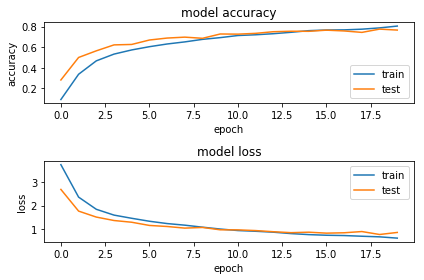

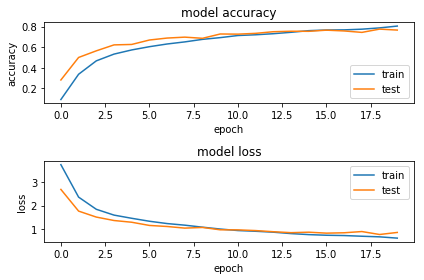

In [101]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/home/uttam/PycharmProjects/ML"
model_name = 'model.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig